In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import numpy as np
plt.style.use('seaborn')
sns.set_style('whitegrid')

In [2]:
### Read data
df = pd.read_csv('data.csv')

In [3]:
### Read first 5 rows
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


In [4]:
### Check type of each column
df.dtypes

Row ID             int64
Order ID          object
Order Date        object
Ship Date         object
Ship Mode         object
Customer ID       object
Customer Name     object
Segment           object
Country           object
City              object
State             object
Postal Code      float64
Region            object
Product ID        object
Category          object
Sub-Category      object
Product Name      object
Sales            float64
dtype: object

In [5]:
### Check if there are any duplicates
df[df.duplicated()]

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales


In [6]:
### Check for null values 
df.isnull().sum()

Row ID            0
Order ID          0
Order Date        0
Ship Date         0
Ship Mode         0
Customer ID       0
Customer Name     0
Segment           0
Country           0
City              0
State             0
Postal Code      11
Region            0
Product ID        0
Category          0
Sub-Category      0
Product Name      0
Sales             0
dtype: int64

In [7]:
### Missing value is the postal code for Burlington
df.loc[df['Postal Code'].isnull()]

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
2234,2235,CA-2018-104066,05/12/2018,10/12/2018,Standard Class,QJ-19255,Quincy Jones,Corporate,United States,Burlington,Vermont,NaN,East,TEC-AC-10001013,Technology,Accessories,Logitech ClearChat Comfort/USB Headset H390,205.03
5274,5275,CA-2016-162887,07/11/2016,09/11/2016,Second Class,SV-20785,Stewart Visinsky,Consumer,United States,Burlington,Vermont,NaN,East,FUR-CH-10000595,Furniture,Chairs,Safco Contoured Stacking Chairs,715.20
8798,8799,US-2017-150140,06/04/2017,10/04/2017,Standard Class,VM-21685,Valerie Mitchum,Home Office,United States,Burlington,Vermont,NaN,East,TEC-PH-10002555,Technology,Phones,Nortel Meridian M5316 Digital phone,1294.75
9146,9147,US-2017-165505,23/01/2017,27/01/2017,Standard Class,CB-12535,Claudia Bergmann,Corporate,United States,Burlington,Vermont,NaN,East,TEC-AC-10002926,Technology,Accessories,Logitech Wireless Marathon Mouse M705,99.98
9147,9148,US-2017-165505,23/01/2017,27/01/2017,Standard Class,CB-12535,Claudia Bergmann,Corporate,United States,Burlington,Vermont,NaN,East,OFF-AR-10003477,Office Supplies,Art,4009 Highlighters,8.04
9148,9149,US-2017-165505,23/01/2017,27/01/2017,Standard Class,CB-12535,Claudia Bergmann,Corporate,United States,Burlington,Vermont,NaN,East,OFF-ST-10001526,Office Supplies,Storage,Iceberg Mobile Mega Data/Printer Cart,1564.29
9386,9387,US-2018-127292,19/01/2018,23/01/2018,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,Vermont,NaN,East,OFF-PA-10000157,Office Supplies,Paper,Xerox 191,79.92
9387,9388,US-2018-127292,19/01/2018,23/01/2018,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,Vermont,NaN,East,OFF-PA-10001970,Office Supplies,Paper,Xerox 1881,12.28
9388,9389,US-2018-127292,19/01/2018,23/01/2018,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,Vermont,NaN,East,OFF-AP-10000828,Office Supplies,Appliances,Avanti 4.4 Cu. Ft. Refrigerator,542.94
9389,9390,US-2018-127292,19/01/2018,23/01/2018,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,Vermont,NaN,East,OFF-EN-10001509,Office Supplies,Envelopes,Poly String Tie Envelopes,2.04


In [8]:
### Add missing values
df['Postal Code'] = df['Postal Code'].fillna(5401)

In [9]:
### Check if it was done correctly
df.isnull().sum()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
dtype: int64

In [10]:
### Convert dates to datetime objects and access the year and month of the order date to create new columns
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Ship Date'] = pd.to_datetime(df['Ship Date'])
df['Year'] = df['Order Date'].dt.year
df['Month'] = df['Order Date'].dt.month

In [11]:
### Select only Sales and Order Date columns
sales_history = df[['Sales','Order Date']]

<Figure size 1152x432 with 0 Axes>

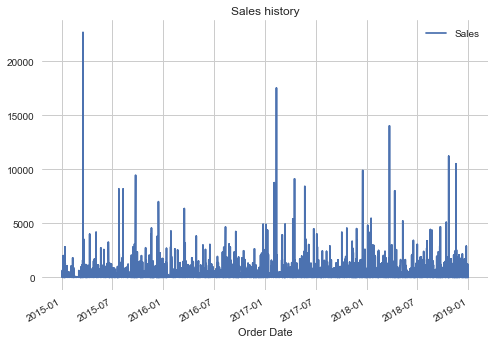

In [12]:
plt.figure(figsize=(16, 6))
sales_history.plot(x = 'Order Date', y='Sales')
plt.title('Sales history')
plt.show()

In [13]:
### Group by state and then get the sum of sales
sales_by_state = df.groupby('State')['Sales'].sum().to_frame().reset_index()

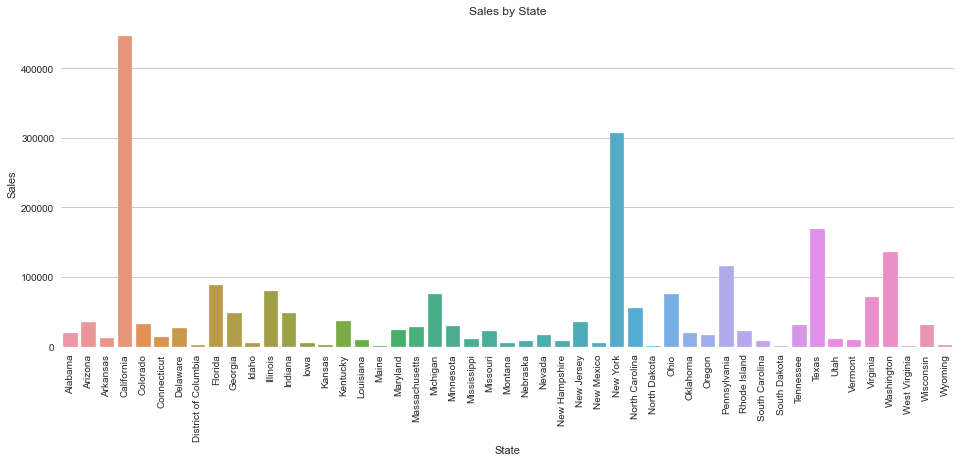

In [14]:
plt.figure(figsize=(16, 6))
sns.barplot(data = sales_by_state,y = 'Sales',x='State').set(title = 'Sales by State')
plt.xticks(rotation = 90)
plt.show()

In [15]:
### Group by city, get the sum of sales for each one, and then sort and select top 10
sales_by_city = df.groupby('City')['Sales'].sum().to_frame().reset_index().sort_values(by ='Sales',ascending = False).head(10)

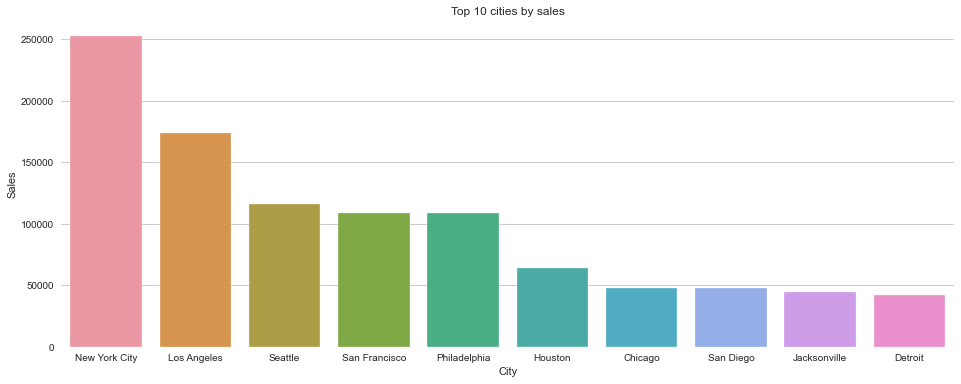

In [16]:
plt.figure(figsize=(16, 6))
sns.barplot(data = sales_by_city,y = 'Sales',x='City').set(title = 'Top 10 cities by sales')
plt.show()

In [17]:
### Group by segment, sum the sales for each one and sort 
total_sales_per_segment = df.groupby('Segment')['Sales'].sum().reset_index().sort_values(by = 'Sales',ascending = False)

In [18]:
total_sales_per_segment

,Segment,Sales
0,Consumer,1.148061e+06
1,Corporate,6.884941e+05
2,Home Office,4.249822e+05


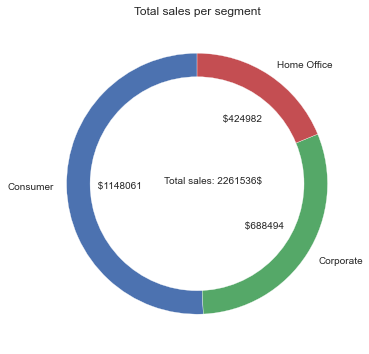

In [19]:
plt.figure(figsize=(16, 6))
### Function to convert percentage to absolute value
def autopct_format(values): 
    def my_format(pct): 
        total = sum(values) 
        val = int(round(pct*total/100.0))
        return ' ${v:d}'.format(v=val)
    return my_format
plt.pie(total_sales_per_segment['Sales'],labels = total_sales_per_segment['Segment'],autopct = autopct_format(total_sales_per_segment['Sales']),startangle=90,)
centre_circle = plt.Circle((0, 0), 0.82, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
### Display sum of all segments sales
plt.annotate(text = 'Total sales: ' + str(int(sum(total_sales_per_segment['Sales']))) + '$',xy =(-0.25, 0))
plt.title('Total sales per segment')
plt.show()

In [20]:
### Group by year and get the number of sales per segment
segment_total_sales_per_year = df.groupby('Year')['Segment'].value_counts()

In [21]:
segment_total_sales_per_year

Year  Segment    
2015  Consumer       1045
      Corporate       601
      Home Office     307
2016  Consumer       1112
      Corporate       608
      Home Office     335
2017  Consumer       1304
      Corporate       775
      Home Office     455
2018  Consumer       1640
      Corporate       969
      Home Office     649
Name: Segment, dtype: int64

In [22]:
### Group by year,month,segment and then add sales
segment_sales_stats = df.groupby(['Year','Month','Segment'])['Sales'].agg([np.sum,np.mean,np.median])
years = segment_sales_stats.index.get_level_values(0)
months = segment_sales_stats.index.get_level_values(1)
segments = segment_sales_stats.index.get_level_values(2)

<Figure size 1152x432 with 0 Axes>

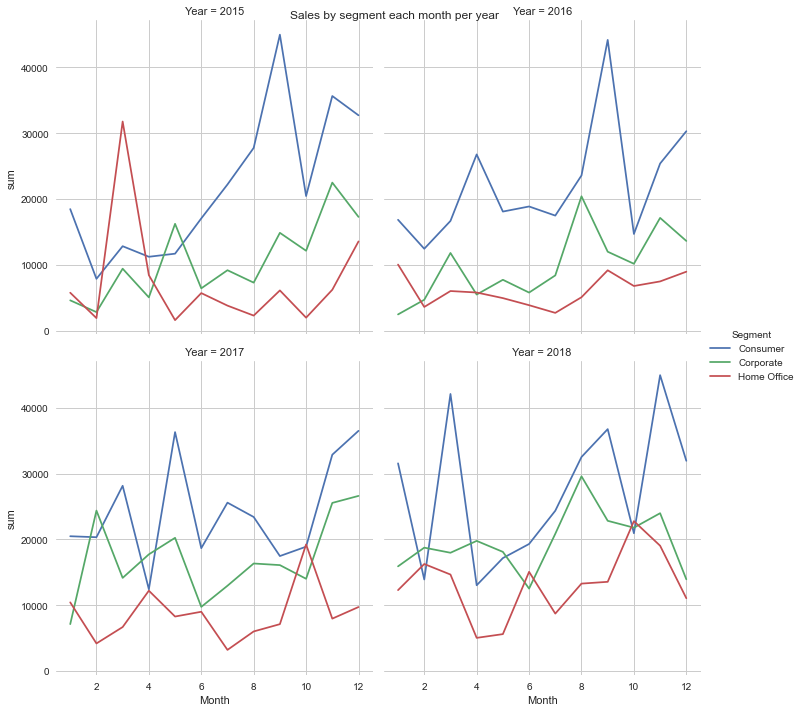

In [23]:
plt.figure(figsize=(16, 6))
fig1 = sns.relplot(kind = 'line',data = segment_sales_stats,y = 'sum',x = months,hue = segments ,col = years ,col_wrap = 2)
fig1.fig.suptitle('Sales by segment each month per year')
plt.show()

In [24]:
### Group by category and sum the sales
total_sales_per_category = df.groupby('Category')['Sales'].sum().reset_index().sort_values(by = 'Sales',ascending = False)

In [25]:
total_sales_per_category

,Category,Sales
2,Technology,827455.8730
0,Furniture,728658.5757
1,Office Supplies,705422.3340


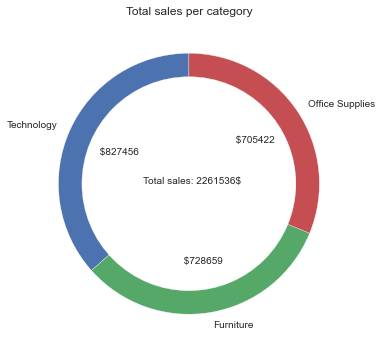

In [26]:
plt.figure(figsize=(16, 6))
### Function to convert percentage to absolute value
def autopct_format(values): 
    def my_format(pct): 
        total = sum(values) 
        val = int(round(pct*total/100.0))
        return ' ${v:d}'.format(v=val)
    return my_format
plt.pie(total_sales_per_category['Sales'],labels = total_sales_per_category['Category'],autopct = autopct_format(total_sales_per_category['Sales']),startangle=90)
centre_circle = plt.Circle((0, 0), 0.82, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
### Display sum of all categories sales
plt.annotate(text = 'Total sales: ' + str(int(sum(total_sales_per_category['Sales']))) + '$',xy =(-0.35, 0))
plt.title('Total sales per category')
plt.show()

In [27]:
### Group by year and get the number of sales per category
category_total_sales_per_year = df.groupby('Year')['Category'].value_counts()

In [28]:
category_total_sales_per_year

Year  Category       
2015  Office Supplies    1192
      Furniture           414
      Technology          347
2016  Office Supplies    1210
      Furniture           440
      Technology          405
2017  Office Supplies    1537
      Furniture           547
      Technology          450
2018  Office Supplies    1970
      Furniture           677
      Technology          611
Name: Category, dtype: int64

In [29]:
### Group by year,month,category and then add sales
category_sales_stats = df.groupby(['Year','Month','Category'])['Sales'].agg([np.sum,np.mean,np.median])
years = category_sales_stats.index.get_level_values(0)
months = category_sales_stats.index.get_level_values(1)
categories = category_sales_stats.index.get_level_values(2)

<Figure size 1152x432 with 0 Axes>

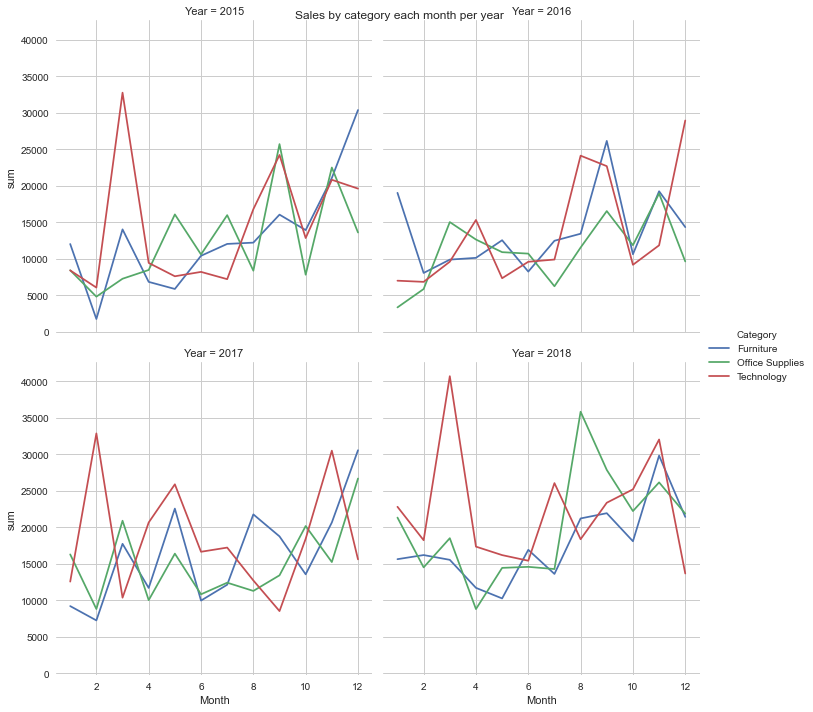

In [30]:
plt.figure(figsize=(16, 6))
fig2 = sns.relplot(kind = 'line',data = category_sales_stats,y = 'sum',x = months,hue = categories ,col = years ,col_wrap = 2)
fig2.fig.suptitle('Sales by category each month per year')
plt.show()

In [31]:
### Group by category and sub category, sum the sales, sort and select top 10
total_sales_per_subcategory = df.groupby(['Category','Sub-Category']).sum().sort_values('Sales', ascending=False).head(10)
### Convert sales column to integer and sort by category
total_sales_per_subcategory = total_sales_per_subcategory[['Sales']].astype(int).sort_values(by = 'Category').reset_index()
### Group sales per subcategory by category and sum the sales again
sales_per_category = total_sales_per_subcategory.groupby('Category').sum().reset_index()

In [32]:
total_sales_per_subcategory

,Category,Sub-Category,Sales
0,Furniture,Chairs,322822
1,Furniture,Tables,202810
2,Furniture,Bookcases,113813
3,Office Supplies,Storage,219343
4,Office Supplies,Binders,200028
5,Office Supplies,Appliances,104618
6,Technology,Phones,327782
7,Technology,Machines,189238
8,Technology,Accessories,164186
9,Technology,Copiers,146248


In [33]:
sales_per_category

,Category,Sales
0,Furniture,639445
1,Office Supplies,523989
2,Technology,827454


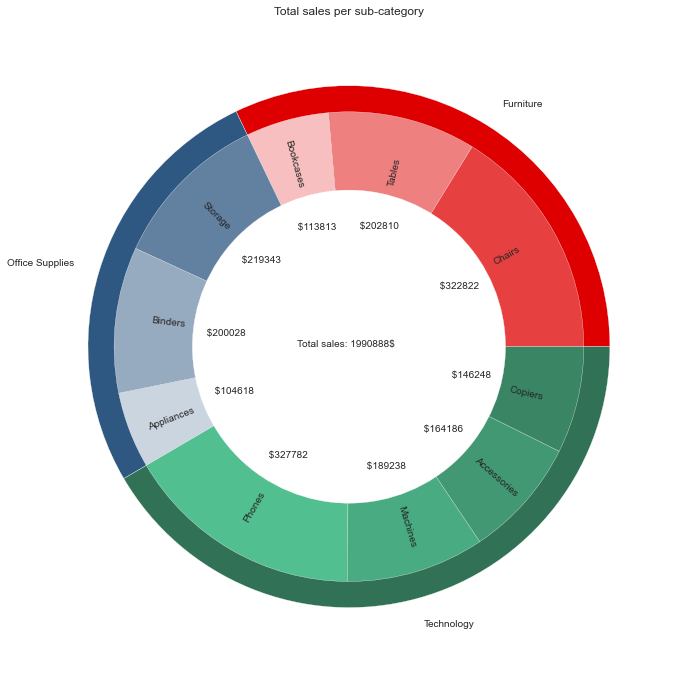

In [34]:
### Colors for each category and sub category
c1 = ['#de0000','#2e5781','#317256']
c2 = ['#e64040','#ef8080','#f7bfbf','#6281a1','#97abc0','#cbd5e0','#52bf90','#49ab81','#419873','#398564']
fig,ax = plt.subplots(figsize=(24,12))
p1 = ax.pie(sales_per_category['Sales'],radius = 1,labels = sales_per_category['Category'],wedgeprops=dict(edgecolor='w'),colors = c1)
p2 = ax.pie(total_sales_per_subcategory['Sales'],radius = 0.9,labels = total_sales_per_subcategory['Sub-Category'],autopct= autopct_format(total_sales_per_subcategory['Sales']),colors = c2, labeldistance=0.7,wedgeprops=dict(edgecolor='w'), pctdistance=0.53,rotatelabels =True)
centre_circle = plt.Circle((0, 0), 0.6, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.annotate(text = 'Total sales: ' + str(int(sum(total_sales_per_subcategory['Sales']))) + '$',xy =(-0.2, 0))
plt.title('Total sales per sub-category')
plt.show()